    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [5]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
0 & 91 & 6.48 & 108.37 \\ \hline
3.37 & 91.25 & 6.26 & 106.48 \\ \hline
3.72 & 93.25 & 5.92 & 105.1 \\ \hline
4.01 & 94.93 & 5.52 & 103.02 \\ \hline
4.47 & 97.53 & 5.34 & 102.05 \\ \hline
4.76 & 99.15 & 4.87 & 99.25 \\ \hline
5.25 & 102.05 & 4.64 & 98.05 \\ \hline
5.47 & 103.33 & 3.8 & 93.55 \\ \hline
5.78 & 105.12 & 3.5 & 92.02 \\ \hline
6.28 & 107.15 & 3.22 & 90.25 \\ \hline
6.48 & 108.37 & 2.76 & 87.67 \\ \hline
--- & --- & 2.26 & 84.97 \\ \hline
--- & --- & 1.41 & 80.52 \\ \hline
--- & --- & 0 & 75.4 \\ \hline



    А вот горизонтальная:

In [3]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
№ & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\ \hline
толщина,\\ \hline
мм & 10.1 & 10.2 & 10.1 & 10.3 & 10.0 & 10.0 & 10.1 & 10.1 & 10.0 & 10.1\\ \hline
суммарная\\ \hline
толщина,\\ \hline
мм & 10.1 & 20.3 & 30.4 & 40.7 & 50.7 & 60.7 & 70.8 & 80.9 & 90.9 & 101\\ \hline
N & 46770 & 47883 & 51174 & 41074 & 77237 & 44965 & 26906 & 16397 & 10624 & 7340\\ \hline
t,\\ \hline
с & 10 & 20 & 40 & 60 & 200 & 200 & 200 & 200 & 200 & 200
\\ \hline



    Теперь основная часть:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import sqrt
from math import log as ln

In [14]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Фон:

In [6]:
N0 = 4102
t0 = 300

Данные:

In [15]:
ln_N_div_t_arr = []
l_arr = []
MNK_info_arr = []
names = ["Алюминий", "Свинец", "Железо"]

for i in range (3):
    N = list (map (int,   input ("N: ").split()))
    t = list (map (int,   input ("t: ").split()))
    l = list (map (float, input ("l ").split()))

    ln_N_div_t = [ln (N[i] / t[i] - N0 / t0) for i in range (len (N))]
    MNK_info_curr = MNK (l, ln_N_div_t)
    print (names[i])
    MNK_info_curr.Print()

    ln_N_div_t_arr += [ln_N_div_t]
    l_arr += [l]
    MNK_info_arr += [MNK_info_curr]

Алюминий
	k = -0.020326168464958765
	b = 8.847376664970588
	sigma_k = 0.0006727037496009757
	sigma_b = 0.03859485207524789
Свинец
	k = -0.11568651297310101
	b = 8.810879554970647
	sigma_k = 0.0018232827504040428
	sigma_b = 0.025113984233735318
Железо
	k = -0.05814184136744287
	b = 8.933358080974585
	sigma_k = 0.0005829628769959609
	sigma_b = 0.01689764433793684


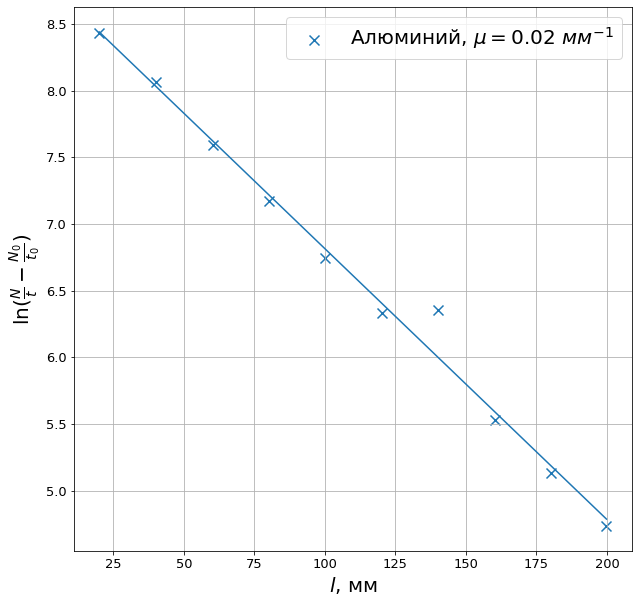

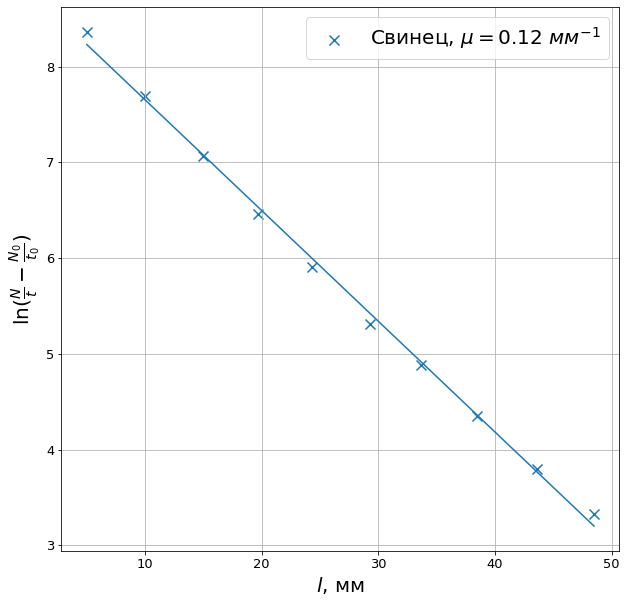

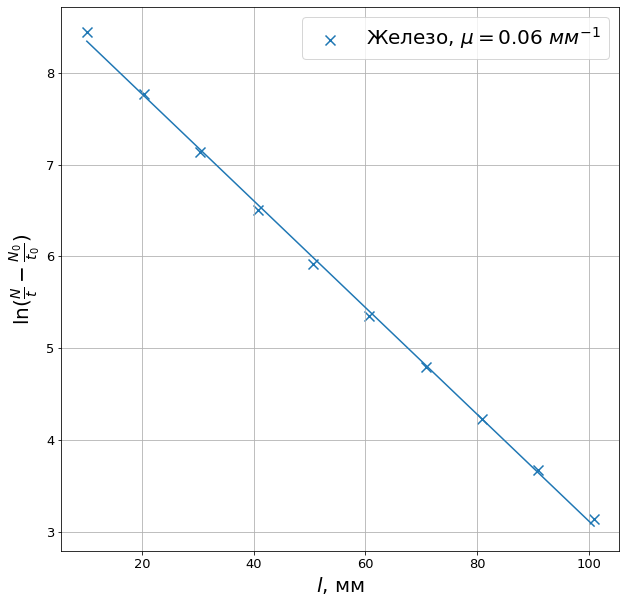

In [31]:
plt.rc('font', size = 13)

for i in range (3):
    ln_N_div_t = ln_N_div_t_arr[i]
    l = l_arr[i]
    MNK_info_curr = MNK_info_arr[i]

    fig = plt.figure(figsize = (10, 10))
    ax  = fig.add_subplot(1,1,1)

    linear = lambda x: MNK_info_curr.k * x + MNK_info_curr.b

    ax.scatter (l, ln_N_div_t, marker = 'x', s=100,
                label = names[i] + ", $\\mu = $" + 
                str (round (-MNK_info_curr.k, 2)) + " $мм^{-1}$")
    ax.plot ([l[0], l[-1]], [linear (l[0]), linear (l[-1])])

    ax.set_xlabel ('$l$, мм', fontsize = 20)
    ax.set_ylabel ('$\ln (\\frac{N}{t} - \\frac{N_0}{t_0})$',  fontsize = 20)

    plt.legend(fontsize = 20)
    ax.grid(True)

    plt.savefig ("Picturies/graph" + str(i) + ".pdf")